# Goal for this Project:
Using data, let's answer the question "which cities rain more?" and through data science workflow, we will investigate the nuance of this question. But first, let's load and clean the data in this notebook!

## Instaling Libraries

In [143]:
pip install -r "/Users/dcnguyen060899/Downloads/First_Quarter_Seattle_U_2025:2026/DATA_5100-01/weather/requirements.txt"


Note: you may need to restart the kernel to use updated packages.


# Load and explore the data

## Import libraries

In [144]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

## Load the data

##### Load the Seattle and Atlanta data set

In [145]:
df_seattle = pd.read_csv("/Users/dcnguyen060899/Downloads/First_Quarter_Seattle_U_2025:2026/DATA_5100-01/weather/data/seattle_rain.csv")

In [146]:
df_atlanta= pd.read_csv("/Users/dcnguyen060899/Downloads/First_Quarter_Seattle_U_2025:2026/DATA_5100-01/weather/data/atlanta_ga_rain.csv")

## Explore the contents of the data sets

##### Start by looking at the head of each data frame.

This will let us see the names of the columns and a few example values for each column.

In [147]:
df_seattle.columns, df_atlanta.columns

(Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
        'WESD', 'WESF'],
       dtype='object'),
 Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object'))

Seattle has two extra columns WESD and WESF that Seattle does not have

##### Examine more rows

In [148]:
df_seattle.head(), df_atlanta.head()

(       STATION                    NAME    DATE  DAPR  MDPR  PRCP  SNOW  SNWD  \
 0  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/1/18   NaN   NaN  0.00   NaN   NaN   
 1  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/2/18   NaN   NaN  0.00   NaN   NaN   
 2  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/3/18   NaN   NaN  0.00   NaN   NaN   
 3  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/4/18   NaN   NaN  0.00   NaN   NaN   
 4  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/5/18   NaN   NaN  0.25   NaN   NaN   
 
    WESD  WESF  
 0   NaN   NaN  
 1   NaN   NaN  
 2   NaN   NaN  
 3   NaN   NaN  
 4   NaN   NaN  ,
        STATION                   NAME        DATE  DAPR  MDPR  PRCP  SNOW  \
 0  US1GACB0068  SMYRNA 0.2 ESE, GA US  2022-06-17   NaN   NaN  0.00   0.0   
 1  US1GACB0068  SMYRNA 0.2 ESE, GA US  2022-06-18   NaN   NaN  0.08   NaN   
 2  US1GACB0068  SMYRNA 0.2 ESE, GA US  2022-06-19   NaN   NaN  0.00   0.0   
 3  US1GACB0068  SMYRNA 0.2 ESE, GA US  2022-06-20   NaN   NaN  0.00   0.0   
 4  US1GACB0068  SM

There are some missing value in some columns in both dataset

##### Are the columns are the same?

##### Use the `info` method to check the data types, size of the data frame, and numbers of missing values.

In [149]:
df_seattle.info(), df_atlanta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47374 entries, 0 to 47373
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  47374 non-null  object 
 1   NAME     47374 non-null  object 
 2   DATE     47374 non-null  object 
 3   DAPR     923 non-null    float64
 4   MDPR     914 non-null    float64
 5   PRCP

(None, None)

As we look at the columns using .columns, we know that Atlanta has two extra columns, from this info method, we can see it clearer that Atlanta has 8 while Seattle has 10

##### We can also compare data frame sizes using the shape attribute

In [150]:
df_seattle.shape, df_atlanta.shape

((1658, 10), (47374, 8))

It is clearly that there is more entries in Atlanta (47374 entries) than Seattle (1658 entries)

## Why might the Atlanta data set be larger?

#### Examine the `STATION` column

##### How many unique stations are present?

In [151]:
df_seattle['NAME'].unique(), df_atlanta['NAME'].unique()

(array(['SEATTLE 2.1 ESE, WA US'], dtype=object),
 array(['SMYRNA 0.2 ESE, GA US', 'TUCKER 2.3 NNE, GA US',
        'PEACHTREE CORNERS 0.9 NNW, GA US', 'DECATUR 1.4 N, GA US',
        'ROSWELL 5.9 SE, GA US', 'DECATUR 1.2 NE, GA US',
        'DUNWOODY 1.2 SW, GA US', 'ATLANTA 3.1 ESE, GA US',
        'ATLANTA FULTON CO AIRPORT, GA US', 'ATLANTA 6.0 NE, GA US',
        'DULUTH 4.0 S, GA US', 'ATLANTA DEKALB PEACHTREE AIRPORT, GA US',
        'DECATUR 2.6 NE, GA US', 'TUCKER 1.3 ENE, GA US',
        'AVONDALE ESTATES 0.4 ESE, GA US', 'ATLANTA 3.2 S, GA US',
        'TUCKER 2.3 W, GA US', 'DECATUR 4.3 NNE, GA US',
        'NORTH DECATUR 3.0 NNE, GA US', 'NORTH DECATUR 2.6 N, GA US',
        'ROSWELL 3.0 ESE, GA US', 'DORAVILLE 2 NNE, GA US',
        'SMYRNA 0.4 NE, GA US', 'SMYRNA 2.3 NE, GA US',
        'EAST POINT 6.3 WNW, GA US', 'TUCKER 0.5 NW, GA US',
        'TUCKER 0.6 NNW, GA US', 'LILBURN 2.5 S, GA US',
        'PEACHTREE CORNERS 1.1 N, GA US', 'COLLEGE PARK 1.6 NNW, GA US',
    

Let's use Atlanta airport because it follows a strict guidelines for data collection hence we would have a more quality data

there are more rows in Atlanta than Seattle simply because there are more station collected

In [152]:
df_atlanta = df_atlanta.loc[df_atlanta['NAME'] == 'ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPORT, GA US']

print("\nNumber of stations after filtering:")
print(df_atlanta['STATION'].nunique())


Number of stations after filtering:
1


Now that Atlanta dataset has one station that match with Seattle dataset, let's see now if Atlanta has approximately similar entries with Seattle since we narrowed down both to one station.

In [153]:
df_atlanta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 41325 to 43150
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1826 non-null   object 
 1   NAME     1826 non-null   object 
 2   DATE     1826 non-null   object 
 3   DAPR     0 non-null      float64
 4   MDPR     0 non-null      float64
 5   PRCP     1826 non-null   float64
 6   SNOW     1826 non-null   float64
 7   SNWD     1826 non-null   float64
dtypes: float64(5), object(3)
memory usage: 128.4+ KB


In [154]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


Yes, both dataset's entries are approximately pretty close (1826 vs. 1658)

#### Examine the `DATE` column

Let's check whether the DATE column is established as an appropriate data type?

In [155]:
df_seattle['DATE'].info, df_atlanta['DATE'].info

(<bound method Series.info of 0         1/1/18
 1         1/2/18
 2         1/3/18
 3         1/4/18
 4         1/5/18
           ...   
 1653    12/27/22
 1654    12/28/22
 1655    12/29/22
 1656    12/30/22
 1657    12/31/22
 Name: DATE, Length: 1658, dtype: object>,
 <bound method Series.info of 41325    2018-01-01
 41326    2018-01-02
 41327    2018-01-03
 41328    2018-01-04
 41329    2018-01-05
             ...    
 43146    2022-12-27
 43147    2022-12-28
 43148    2022-12-29
 43149    2022-12-30
 43150    2022-12-31
 Name: DATE, Length: 1826, dtype: object>)

NO, we clearly see that both data set, DATE variable is a string (object), we need to convert it to datetime using pandas library datetime

### Convert `DATE` to datetime

In [156]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])
df_atlanta['DATE'] = pd.to_datetime(df_atlanta['DATE'])

/var/folders/v5/s7m5yfm11_qc71fz_fdnk7br0000gn/T/ipykernel_86490/2711842392.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


Let's check if it is datetime now:

In [157]:
# double checking:
df_seattle['DATE'].info(), df_atlanta['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1658 entries, 0 to 1657
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
1658 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.1 KB
<class 'pandas.core.series.Series'>
Index: 1826 entries, 41325 to 43150
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
1826 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.5 KB


(None, None)

Now that the DATE column's Dtype of both are datatime64[ns]

### What range of dates are present?

Let's double check the range of date to make sure that it is from 2018 Jan 1st to 2022 Dec 31st

In [158]:
print("Seattle date range:")
print(f"Start: {df_seattle['DATE'].min()}")
print(f"End: {df_seattle['DATE'].max()}\n")

print("Atlanta date range:")
print(f"Start: {df_atlanta['DATE'].min()}")
print(f"End: {df_atlanta['DATE'].max()}")

Seattle date range:
Start: 2018-01-01 00:00:00
End: 2022-12-31 00:00:00

Atlanta date range:
Start: 2018-01-01 00:00:00
End: 2022-12-31 00:00:00


Earlier, when we order the data, we selected both data from 2018 to 2022, it make sense that we would have data from 2018 to 2022

### Are the data suitable for answering the question?

Plot the daily precipitation data for Seattle.

<Axes: xlabel='DATE', ylabel='PRCP'>

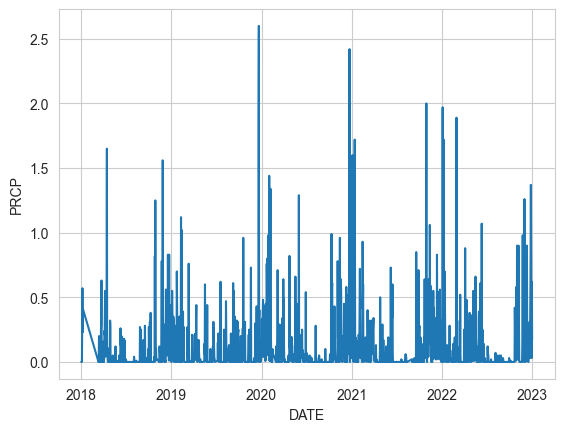

In [159]:
sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

there is a line that does not going vertical but more like a diagonal, we need to further investigate why it is like that. But for now, we're suspecting that there is missing data in the beginning of 2018

##### Plot the daily precipitation data for Atlanta.

<Axes: xlabel='DATE', ylabel='PRCP'>

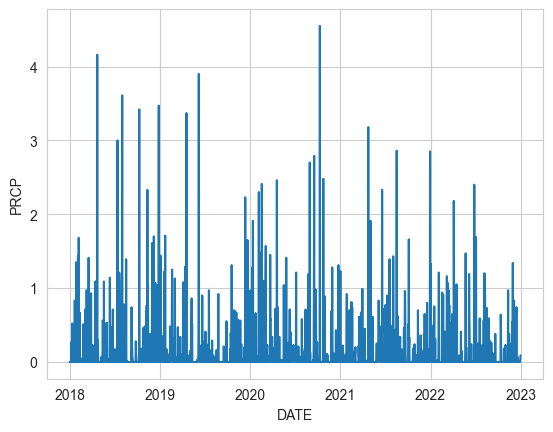

In [160]:
sns.lineplot(data=df_atlanta, x='DATE', y='PRCP')

Atlanta dataset is looking more clean from the look of this line plot visualization. For now let, assume there is no missing data. However, we would double check for missing data in more detail later because in the beginning, before filtering we can see that there is missing value in Atlanta as well. However, from this visualization, we can suspecting that after filtering to only STATION: "ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPORT, GA US", possibly that there is no missing value in this station.

## Join data frames keeping `DATE` and `PRCP` columns

In [161]:
print("Seattle columns:")
print(df_seattle.columns.tolist())
print("\nAtlanta columns:")
print(df_atlanta.columns.tolist())

print("\nDataset shapes:")
print(f"Seattle: {df_seattle.shape}")
print(f"Atlanta: {df_atlanta.shape}")

print("\nSample data from both:")
print("\nSeattle first 2 rows:")
print(df_seattle.head(2))
print("\nAtlanta first 2 rows:")
print(df_atlanta.head(2))

Seattle columns:
['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD', 'WESD', 'WESF']

Atlanta columns:
['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD']

Dataset shapes:
Seattle: (1658, 10)
Atlanta: (1826, 8)

Sample data from both:

Seattle first 2 rows:
       STATION                    NAME       DATE  DAPR  MDPR  PRCP  SNOW  \
0  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-01   NaN   NaN   0.0   NaN   
1  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-02   NaN   NaN   0.0   NaN   

   SNWD  WESD  WESF  
0   NaN   NaN   NaN  
1   NaN   NaN   NaN  

Atlanta first 2 rows:
           STATION                                               NAME  \
41325  USW00013874  ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...   
41326  USW00013874  ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...   

            DATE  DAPR  MDPR  PRCP  SNOW  SNWD  
41325 2018-01-01   NaN   NaN   0.0   0.0   0.0  
41326 2018-01-02   NaN   NaN   0.0   0.0   0.0  


Both datasets have common columns, since this study, we focus on precipitation across time, however, Seattle has extra columns, but we most likely drop it. Lets use outer merge on DATE and only keep DATE and PRCP

In [162]:
# select only needed columns and add city name to PRCP
seattle_subset = df_seattle[['DATE', 'PRCP']].rename(columns={'PRCP': 'PRCP_SEA'})
atlanta_subset = df_atlanta[['DATE', 'PRCP']].rename(columns={'PRCP': 'PRCP_ATL'})

# Merging the datasets
merged_df = pd.merge(
    seattle_subset,
    atlanta_subset,
    on='DATE',
    how='outer'
)

# Verify the merge
print("Merged dataset shape:", merged_df.shape)
print("\nFirst few rows:")
print(merged_df.head())

Merged dataset shape: (1826, 3)

First few rows:
        DATE  PRCP_SEA  PRCP_ATL
0 2018-01-01      0.00       0.0
1 2018-01-02      0.00       0.0
2 2018-01-03      0.00       0.0
3 2018-01-04      0.00       0.0
4 2018-01-05      0.25       0.0


In [163]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      1826 non-null   datetime64[ns]
 1   PRCP_SEA  1636 non-null   float64       
 2   PRCP_ATL  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 42.9 KB


Initially there is 22 missing value from Seattle's precipitation, and now merge create a 168 additional rows (1826 - 1658) for dates not in Seattle's data. So the missing data would be 22 + 168 = 190 for precipitation for Seattle. Let check that later when we come up with algorithm to impute missing data.


### Create a tidy data frame with columns for city and precipitation

let's tidy the dataframe using melt, making the city into one column, instead of prcp columns of different city and name it precipitation

In [164]:
# metlting the dataframe
tidy_df = pd.melt(
    merged_df,
    id_vars=['DATE'],
    value_vars=['PRCP_SEA', 'PRCP_ATL'],
    var_name='city',
    value_name='precipitation'
)

# now the name of city column is PRCP_SEA and PRCP_ATL, we want to remove the PRCP_ part
tidy_df['city'] = tidy_df['city'].str.replace('PRCP_', '')

# since we working with new tidy dataframe, let's clean it up a bit by sorting the values by date and city, and resetting the index
tidy_df = tidy_df.sort_values(['DATE', 'city']).reset_index(drop=True)


How did this change the DataFrame?

In [165]:
tidy_df

,DATE,city,precipitation
0,2018-01-01,ATL,0.00
1,2018-01-01,SEA,0.00
2,2018-01-02,ATL,0.00
3,2018-01-02,SEA,0.00
4,2018-01-03,ATL,0.00
...,...,...,...
3647,2022-12-29,SEA,0.03
3648,2022-12-30,ATL,0.03
3649,2022-12-30,SEA,0.62
3650,2022-12-31,ATL,0.09


## Identify and fill in missing values

Data can be missing in multiple manners:
1. Values are `NaN` in the data frame

2.  Values are not included in the data set.

### Count the non-null or null values

Determine the number of non-null values in each column.

In [166]:
tidy_df.notnull().sum()

DATE             3652
city             3652
precipitation    3462
dtype: int64

##### Determine the number of null values in each column.

In [167]:
tidy_df.isnull().sum()

DATE               0
city               0
precipitation    190
dtype: int64

We manually calculate the missing data earlier, and this confirmed that. We indeed has 190 missing value for Seattle's precipitation, 22 from the original dataset and 168 from outer merged because Atlanta has 168 more data than Seattle dataset

##### Determine the number of null precipitation values for Seattle and Atlanta.

In [168]:
num_null_sea = tidy_df[(tidy_df['city'] == 'SEA')]['precipitation'].isnull().sum()
num_null_atl = tidy_df[(tidy_df['city'] == 'ATL')]['precipitation'].isnull().sum()
print(f"Number of null precipitation values for Seattle: {num_null_sea}")
print(f"Number of null precipitation values for Atlanta: {num_null_atl}")

Number of null precipitation values for Seattle: 190
Number of null precipitation values for Atlanta: 0


##### The Atlanta data set does not have any `NaN` values of `precipitation`. Are any dates omitted?

**How many data points should we have from 2018 to 2022?**

In [169]:
# Count unique dates
print(f"Number of unique dates: {tidy_df['DATE'].nunique()}")

# Expected number of days
date_range = pd.date_range(start='2018-01-01', end='2022-12-31')
print(f"Expected number of days: {len(date_range)}")

Number of unique dates: 1826
Expected number of days: 1826


In [170]:
print("Total records:", len(tidy_df))
print("Records per city:")
print(tidy_df['city'].value_counts())

Total records: 3652
Records per city:
city
ATL    1826
SEA    1826
Name: count, dtype: int64


this confirms that each city has the same entry of data points, both are tidy data, now we just need to deal with missing data from Seattle

### Impute missing values

We will replace missing values with the mean across years of values on that day.


**Design an algorithm for replacing missing values with the mean across years of values on that day.**

### Here is my algotithm, how i would approach this:

In [171]:
# let's create a month_day column, since we want to fill these with average values from the same calendar day across different years
tidy_df['month_day'] = tidy_df['DATE'].dt.strftime('%m-%d')
seattle_daily_means = tidy_df[
    (tidy_df['city'] == 'SEA') &
    (tidy_df['precipitation'].notnull())
].groupby('month_day')['precipitation'].mean()

# let's create a identifier for missing values in Seattle
missing_value_seattle = (tidy_df['city'] == 'SEA') & (tidy_df['precipitation'].isnull())

# let's search for all the missing values in Seattle and fill them with the corresponding average from seattle_daily_means
tidy_df.loc[missing_value_seattle, 'precipitation'] = tidy_df.loc[missing_value_seattle, 'month_day'].map(seattle_daily_means)

# note that the .map() for every missing value in Seattle, it looks up the month_day in seattle_daily_means and fills in the average precipitation for that day
# simply put it look up for every missing value of the month_day in the seattle data set then replace it with the mean value of month_day of not missing seattle data set 

In [172]:
# let's check the null
tidy_df.isnull().sum()

DATE             0
city             0
precipitation    0
month_day        0
dtype: int64

In [173]:
tidy_df.drop(columns=['month_day'], inplace=True)

In [174]:
tidy_df

,DATE,city,precipitation
0,2018-01-01,ATL,0.00
1,2018-01-01,SEA,0.00
2,2018-01-02,ATL,0.00
3,2018-01-02,SEA,0.00
4,2018-01-03,ATL,0.00
...,...,...,...
3647,2022-12-29,SEA,0.03
3648,2022-12-30,ATL,0.03
3649,2022-12-30,SEA,0.62
3650,2022-12-31,ATL,0.09


## Export the clean .csv file

In [179]:
tidy_df.to_csv('/Users/dcnguyen060899/Downloads/First_Quarter_Seattle_U_2025:2026/DATA_5100-01/weather/data/clean_seattle_atlanta_seattle_weather.csv', encoding='utf-8-sig', index=False)